# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

## 0. Основные понятия и обозначения

В предыдущих курсах студенты уже знакомились с признаковыми описаниями, основными алгоритмами машинного обучения и Python-библиотеками, используемыми для решения задач в этой области. Однако, перед началом изучения программы курса давайте повторим основные понятия и обозначения, используемые в машинном обучении.

Машинное обучение - дисциплина, заключаящаяся в извлечении знаний из известных данных. Машинное обучение - это раздел математики, поэтому в нем мы будем, помимо всего прочего, работать с формулами.

_Объект_ - то, для чего нужно сделать предсказание. Например, в задаче распознавания спам-почты объектом будет являться письмо. Объекты обозначаются буквой $x$. Множество всех объектов, для которых может потребоваться сделать предсказания, называется _пространством объектов_ и обозначается $\mathbb{X}$.

_Ответ_ - то, что нужно предсказать. В том же примере распознавания спама ответом будет является информация о том, является письмо спамом или нет. Ответы обозначаются буквой $y$ (можно сказать, что $y = y(x)$, так как ответ зависит от объекта). _Пространство ответов_ - множество всех ответов, с которыми мы можем работать. Оно обозначается $\mathbb{Y}$. В примере задачи распознавания спама оно состоит из двух элементов: $+1$ и $-1$ (означающие, что письмо является и не является спамом, соответственно).

Для реализации машинного обучения компьютеру нужно "объяснить" объекты, которые в первоначальном виде он понять не может, с помощью сущностей, ему понятных, например, чисел. Для этого вводится понятие _признаков_. Признак - это некая числовая характеристика объекта. Совокупность всех признаков объекта $x = (x^{1}, x^{2},..., x^{d})$ называется его _признаковым описанием_. Оно является $d$-мерным вектором, то есть к нему можно применять все операции, описанные линейной алгеброй.

Множество значений $i$-го признака будем обозначать $D_{i}$. Существует множество различных видов признаков:

- _Бинарные признаки_ принимают два значения: $D_{i} = \{0,1\}$. Примером  в задаче кредитного скоринга может служить ответ, выше ли доход клиента определенной установленной суммы. При положительном ответе признак полагается равным 1, при отрицательном - 0.

- _Вещественные признаки_ могут принимать в качестве значений все вещественные числа: $D_{i} = \mathbb{R}$. Примерами могут выступать возраст человека, заработная плата, количество звонков в колл-центр в месяц и т.д.

- _Категориальные признаки_ - это такие признаки, значения которых можно сравнивать только на равенство, и нельзя на "больше-меньше". В этом случае $D_{i}$ - неупорядоченное множетсво. Примерами таких признаков могут выступать город, в котором родился клиент банка, или его образование.

- _Порядковые признаки_ - частный случай категоиральных признаков. В этом случае $D_{i}$ - упорядоченное множество. Признаки можно сравнивать между собой, но нельзя определить расстояние между ними. Например, то же образование, но с введенным осмысленным порядком (высшее образование больше среднего профессионального, которое в свою очередь больше среднего и т.д.)

- _Множествозначные признаки_ - признаки, значения которых на объекте являются подмножеством некоторого множества. Например, в задачах анализа текстов таким признаком является множество слов, которые входят в текст. Оно является подмножеством большого словаря.

В первой части нашего курса мы рассмотрим алгоритмы _обучения с учителем_ или _контролироемого обучения (supervised learning)_. Данный метод заключается в восстановлении общей закономерности по конечному числу известных примеров.

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых мы планируем строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x^{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, помогающая нам делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

В нашем примере распознавания спама такой моделью может являться линейный алгоритм (сумма всех признаков с некоторыми коэффициентами, также называемыми весами, $w_{i}$ c прибавлением константного коэффициента $w_{0}$):

$$a(x) = sign(w_{0} + w_{1}x^{1}+w_{2}x^{2}+...+w_{d}x^{d}).$$

Признаками в ней могут выступать наличие определенных слов в письме, наличие отправителя в адресной книге получателя, дата и время отправления, наличие фишинговых url и т.д. Операция взятия знака от этого выражения берется так как в примере распознавания спама пространство ответов состоит всего из двух элементов, как говорилось ранее.

Для решения определенной задачи не все алгоритмы одинаково хорошо подходят. Для определения наиболее подходящего алгоритма введена характеристика, называемая _функционалом ошибки_ $Q(a, X)$. Он принимает на вход алгоритм и выборку и сообщает, насколько хорошо данный алгоритм работает на данной выборке. В примере распознавания спам-писем в качестве такого функционала может выступать доля неправильных ответов (предсказаний). Задача обучения заключается в подборе такого алгоритма, при котором достигается минимум функционала ошибки $Q(a, X)\rightarrow min.$

Наиболее подходящий алгоритм при этом выбирается из множества, называемого _семейством алгоритмов_ $\mathbb{A}$. Их мы будем рассматривать в данном курсе.

---
Постановка задачи:

$\mathbb{X}$ - Пространство объектов

$\mathbb{Y}$ - Пространство ответов (предсказаний)

Чтобы компьютер мог понять объект, ему нужно "объяснить". Сделаем описание объекта через признаки. 

_Признак_ - это некая числовая характеристика объекта.

Допустим количество признаков $d$, тогда $x = (x^{1}, x^{2},..., x^{d})$ - вектор-признак, признаковое описание объекта.

Допустим количество объектов $l$, тогда $i$-ый вектор-признак $x^{i}$ будет иметь множество значений $D_{i}=(x_{1}^{i}, x_{2}^{i},..., x_{l}^{i})$, а $D$ - множество значений всех векторов-признаков.

$$D = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

Центральным понятием машинного обучения является _обучающая выборка_. Это примеры, на основе которых мы планируем строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x^{i}, y_{i})^l_{i=1}.$$

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, помогающая нам делать предсказания, называется _алгоритмом_ или _моделью_ и обозначается $a(x)$. Она принимает на вход объект и выдает ответ.

Для решения определенной задачи не все алгоритмы одинаково хорошо подходят. Для определения наиболее подходящего алгоритма введена характеристика, называемая _функционалом ошибки_ $Q(a, X)$. Он принимает на вход алгоритм и выборку и сообщает, насколько хорошо данный алгоритм работает на данной выборке. Задача обучения заключается в подборе такого алгоритма, при котором достигается минимум функционала ошибки $Q(a, X)\rightarrow min$.

Наиболее подходящий алгоритм при этом выбирается из множества, называемого _семейством алгоритмов_ $\mathbb{A}$.

---

## 1. Линейная регрессия. MSE

В предыдущем разделе мы упоминали линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Само название модели говорит о том, что зависимость предсказываемой переменной от признаков будет линейной:

$$a(x) = w_{0}+w_{1}x^{1}+w_{2}x^{2}+...+w_{d}x^{d}$$

$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}$$
 
В данном случае парамертрами моделей являются веса $w_{i}$. Вес $w_{0}$ называется _свободным коэффициентом_ или _сдвигом_. Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:

$$\sum^{d}_{i=1}w_{i}x^{i} = \left \langle w,x \right \rangle$$

$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
Обратим внимание, что сдвиг делает модель неоднородной и затрудняет ее дальнейшую оптимизацию. Для устранения этого фактора обычно используют прием, позволяющий упростить запись: к признаковому описанию объекта добавляется еще один признак (константный), на каждом объекте равный единице. В этом случае вес при нем как раз будет по смыслу совпадать со свободным коэффициентом, и сам $w_{0}$ будет не нужен. Тогда получим
 
$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$
 
За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

---
__ВАЖНО!__

Для обучения модели необходимо иметь возможность измерять точность линейного алгоритма на выборке (обучающей или тестовой). 

В качестве меры ошибки можно взять абсолютное отклонение истинного значения от прогноза $Q(a,y)=a(x)-y$, но тогда минимизация функционала ошибки (в которой и состоит задача обучения) будет достигаться при принятии им отрицательного значения. Например, если истинное значение ответа равно $10$, а алгоритм $a(x)$ выдает ответ $11$, отклонение будет равно $1$, а при значении предсказания равном $1$, отклонение будет равно $1-10=-9$. Значение ошибки во втором случае ниже, однако разница истинного значения и предсказания нашей модели больше. Таким образом, такой функционал ошибки не поддается минимизации. 

---

Логичным кажется решение использовать в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

__Однако, как мы далее увидим, зачастую методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле, поэтому ее оптимизация бывает затруднительной.__

Поэтому сейчас основной способ измерить отклонение - посчитать квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

---

__Качество решения задачи линейной регрессии__

1. Средняя Абсолютная Ошибка (Mean Absolute Error, MAE)

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

2. Средняя квадратичная ошибка (Mean Square Error, MSE)

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

---

__Пример:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
np.random.seed(1234)

Количество признаков, d: 1

Количество объектов, l: 1000

Модель: $a(x) = w_{0}+w_{1}x^{1}$

$D_{i}=(x_{1}^{1}, x_{2}^{1},..., x_{l}^{i})$

In [3]:
n_features = 1
n_objects = 1000

Сгенерируем вектор истиных весов $w$, состоящий только из $w_{1}$, и матрицу признаков $X$, которая состоит из одного признака $x^{1}$ и l объектов.

Учитываем константный признак и свободный коэффициент $w_{0}$

In [4]:
w_0 = 10
w_true = np.random.normal(size=(n_features, ))
w_true = np.hstack((w_true,[w_0]))

scaleX = 1
X = np.random.uniform(-scaleX, scaleX, (n_objects, n_features))
# добавляем константный признак x_0 = (1, ..., 1)
X = np.hstack((X,np.ones((n_objects,1))))
pprint(w_true)
pprint(X)

array([ 0.47143516, 10.        ])
array([[-0.12454452,  1.        ],
       [ 0.57071717,  1.        ],
       [ 0.55995162,  1.        ],
       ...,
       [-0.04550925,  1.        ],
       [-0.19778718,  1.        ],
       [ 0.8612288 ,  1.        ]])


Вычислим матрицу ответов Y с добавлением случайного шума и с помощью матрицы признаков X. 

In [5]:
noise_th = 0.1
noise = np.random.normal(0, noise_th, size=(n_objects))
Y = X.dot(w_true) + noise
pprint(Y[:15])

array([ 9.82218776, 10.40718492, 10.27082354,  9.81683794,  9.8346601 ,
       10.20577913, 10.42538197, 10.21260774,  9.85196479,  9.94540279,
       10.12278998, 10.26986228,  9.85312724,  9.93075688,  9.97667464])


Соответственно у нас теперь есть пары X, Y.

Зададим идеальную модель

In [6]:
X_true = np.array([[-scaleX, 1],[scaleX,1]])
Y_true =  X_true.T.dot(w_true)

In [7]:
X_true, Y_true

(array([[-1,  1],
        [ 1,  1]]),
 array([ 9.52856484, 10.47143516]))

Сравним реальную выборку (пары объект-ответ) и идеальную модель. 

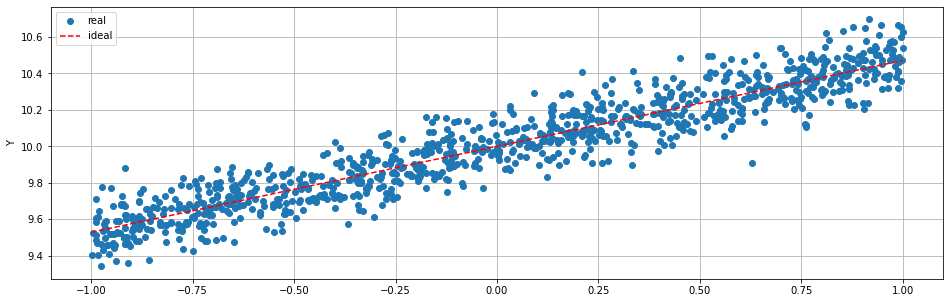

In [8]:
plt.figure(figsize = (16,5))
plt.plot(X[:,0], Y,'o', label = 'real')
plt.plot(X_true[:,0], Y_true,'r--', label = 'ideal')
plt.grid()
plt.legend()
plt.ylabel('Y')
plt.show()

Как видим объекты находятся в области модели в пределах определенной погрешности (на определенном расстоянии).

## 2. Метод наименьших квадратов

---

__МНК это не модель, а метод оптимизации моделей!__

МНК - способ оптимизации весов путем минимизации среднеквадратичного отклонения (Среднеквадратичной ошбки, MSE).

По-английский: Least squares method (LSM)

---

Как уже говорилось ранее, обучение модели регрессии заключается в минимизации функционала ошибки. Таким образом, в случае использования среднеквадратичной ошибки получаем задачу оптимизации

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Способ вычисления весов путем минимизации среднеквадратичного отклонения называется _методом наименьших квадратов_.

Заметим, что здесь мы переписали выражение функционала ошибки, заменив $a(x)$ на скалярное призведение $\left \langle w,x \right \rangle$, после чего мы уже имеем функцию, а не функционал ошибки, так как $Q$ зависит не от некоторой функции $a(x)$, а от вектора весов $w$, и оптимизировать нужно именно по нему, что гораздо проще.

Имеет смысл переписать имеющиеся соотношения в матричном виде. В матрицу "объекты-признаки" впишем по строкам $d$ признаков для всех $l$ объектов из обучающей выборки: 

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\ 
... & ... & ...\\ 
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

Строка - вектор-признак одного объекта, столбец - множество значений одного признака.

Составим вектор ответов $y$ из истинных ответов для данной выборки:

$$y = \begin{pmatrix}
y_{1}\\ 
...\\ 
y_{l}
\end{pmatrix}.$$

Помня, что $w$ - вектор параметров, переписанная в матричном виде задача будет выглядеть следующим образом:

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

где используется евклидова ($L_{2}$) норма, $w$ - то что нужно найти!

Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации (ссылка на подробный вывод формулы есть в списке дополнительных материалов):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии. Наличие аналитического решения кажется положительным фактором, однако, у него есть некоторые минусы, среди которых вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), а также тот факт, что матрица $X^{T}X$ может быть вырожденной и поэтому необратимой. Тогда найти решение будет невозможно.

__Пример:__

In [9]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [10]:
# реализация решения задачи минимизации - нормального уравнения линейной регрессии.
def fit_LSM(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

Из предыдущего примера мы уже имеет обучающую выборку.
Признаки - $X$, Ответы - $Y$.

In [11]:
X.shape, Y.shape

((1000, 2), (1000,))

Найдем $w$ с помощью LSM (МНК) по формуле выше. 

In [12]:
w_lsm = fit_LSM(X[:,:n_features], Y)
w_lsm

array([ 0.47551188, 10.00124764])

Получили, что $w_{1} = 0.47551188$, $w_{0}=10.00124764$.

Ту же самую задачу можно решить и так:

In [13]:
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}')

[ 0.47551188 10.00124764]
В случае использования нормального уравнения функционал ошибки составляет 0.0099


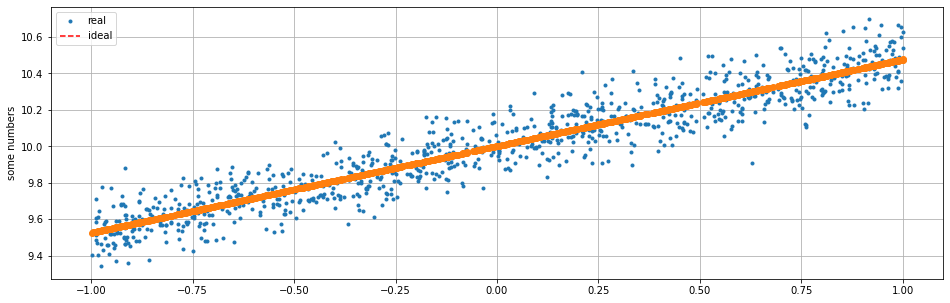

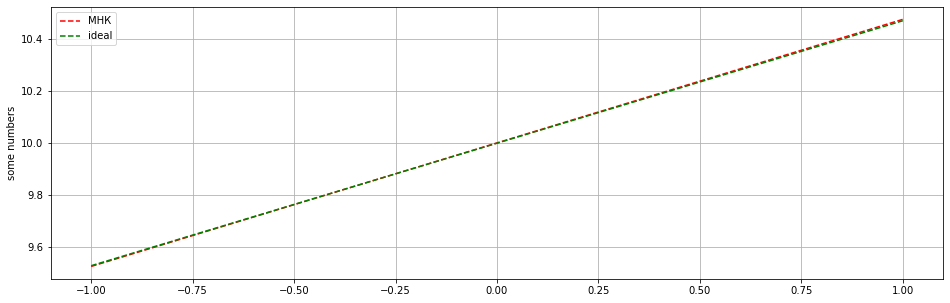

In [14]:
N = 1000
plt.figure(figsize = (16,5))
plt.plot(X[:N,:n_features], Y[:N],'.', label = 'real')
plt.plot(X_true[:,:n_features], Y_true,'r--', label = 'ideal')

plt.plot(X[:N,0],np.dot(X[:N,:],normal_eq_w),'o')
plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (16,5))

#plt.plot(X_true, Y_true,'r--', label = 'ideal')
plt.plot(X_true[:,:n_features],np.dot(X_true,normal_eq_w),'r--', label = 'МНК')
plt.plot(X_true[:,:n_features],Y_true,'g--', label = 'ideal')

plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

Вывод по графику: Мы видим, что оптимизация по МНК определила почти самые оптимальные веса для модели линейной регрессии. График весов по МНК соответствует идеальной модели линейной регрессии с ошибкой 0.0099.

In [15]:
X_ = X.copy()
X_[:,0] = 1

In [16]:
X_[:10,:]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [17]:
X[:10,:]

array([[-0.12454452,  1.        ],
       [ 0.57071717,  1.        ],
       [ 0.55995162,  1.        ],
       [-0.45481479,  1.        ],
       [-0.44707149,  1.        ],
       [ 0.60374436,  1.        ],
       [ 0.91627871,  1.        ],
       [ 0.75186527,  1.        ],
       [-0.28436546,  1.        ],
       [ 0.00199025,  1.        ]])

In [18]:
normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)

[ 0.47551188 10.00124764]


In [19]:
fit_LSM(X[:,:n_features], Y)

array([ 0.47551188, 10.00124764])

Вспомним минусы изученного метода МНК:

$$w = (X^{T}X)^{-1}X^{T}y.$$

1. Матрица $X^{T}X$ может быть вырожденной и поэтому необратимой и тогда мы не сможем найти решения.
2. Признаки могут быть мультиколлинеарными, а такие признаки очень плохо влияют на линейные модели. Поскольку вклад одного признака в другой может быть исскуственным.
3. Вычислительная сложность операции. Обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$.

В связи с этими минусами более удобным подходом будет разработка решения с помощью численных методов оптимизации, одним из которых является _градиентный спуск_

## 3. Градиентный спуск

---

__Градиентный спуск - это не модель, а метод оптимизации моделей!__

Градиентный спуск (Gradient descent, GD) метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента.

МНК - способ оптимизации весов путем минимизации среднеквадратичного отклонения (Среднеквадратичной ошбки, MSE).

По-английский: Least squares method (LSM)

---

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{1}}, \frac{\partial f}{\partial x_{2}}, ..., \frac{\partial f}{\partial x_{d}}\right).$$

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки. 

Градиент функции ошибки на шаге $k$: $$\nabla Q(w^{k}, X)$$

Антиградиент функции ошибки на шаге $k$: $$-\nabla Q(w^{k}, X)$$

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

---
__Немного про вектор весов__

Напонимаю, что вектор весов это 

$$w^{i} = (w_{1}^{i}, w_{2}^{i}, ..., w_{d}^{i})$$

Если учесть свободный коэффициент (сдвиг), для которого признаки равны 1. 

$$w^{i} = (w_{0}^{i}, w_{1}^{i}, w_{2}^{i}, ..., w_{d}^{i})$$

---

---
__Немного про шаг__ 

$\eta_{k}$ - шаг обучения или скорость обучения. При обучении, говорят, что мы движеимся по поверхности ошибки со скоростью $\eta_{k}$.

По своей сути $\eta_{k}$ - этото некая эвристика алгоритма градиентного спуска. Связано это с тем, что когда начинаем вычислять производную, мы можем оказаться на довольно крутом склоне и производная будет равна бесконечности. Также таких склонов может быть, например, два и мы можем прыгать между ними, получая все время значение бесконечности. Это плохо, и поэтому мы делаем так, чтобы сдвиг по поверхности ошибки (сдвиг производной) был короче. То есть вводим ограничение на изменение, которое делаем за 1 шаг. А изменения становятся плавными. 

__Как выбрать шаг $\eta_{k}$?__ Это делается экспериментально. 

Чтобы хорошо взять производную, функция ошибки $Q$ должна быть хорошо дифференцируема, поэтому функция средней абсолютной ошибки (MAE) плохо подходит. А среднеквадратичная ошибка наоборот имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

---

Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки 

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Смоделируем работу градиентного спуска при помощи Numpy.

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.

$$w = (X^{T}X)^{-1}X^{T}y.$$

---

__Про начальную точку__ $w^{0}$:

Выбор начальной точки носит случайный характер, однако она очень важна. Это связано с тем, что в зависимости от поверхности ошибки, наш "спуск" может пойти в совершенно разные стороны и поэтому результат может быть разным. Это четко видно на графиках из вебинара/презентации.

---

__Пример:__

В прошлом примере мы обучали линейную регрессию с помощью LSM, теперь обучим линейную регрессию путем градиентного спуска (GD) и получим графики изменения весов и ошибки.

Зададим исходные данные для реализации алгоритма градиентного спуска: стартовые веса $w^{0}$, шаг $\eta_{k}$, критерий сходимости $\varepsilon$.

In [20]:
# список векторов весов после каждой итерации, установка начальной точки.
w = w_true.copy()
w[:] = 1
w_list = [[0]+w.copy().tolist()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

Ход градиентного спуска, который помимо критерия сходимости ограничен еще и количеством итераций:

In [21]:
while (weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta/1 * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]#(iter_num*0.01+1)
    # оценка расстояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

In [22]:
print(X.shape, w.shape)
print(f"Новые веса: {new_w}")

(1000, 2) (2,)
Новые веса: [ 0.475512   10.00124763]


In [23]:
w_array= np.array(w_list[:])
w_array.shape

(218, 3)

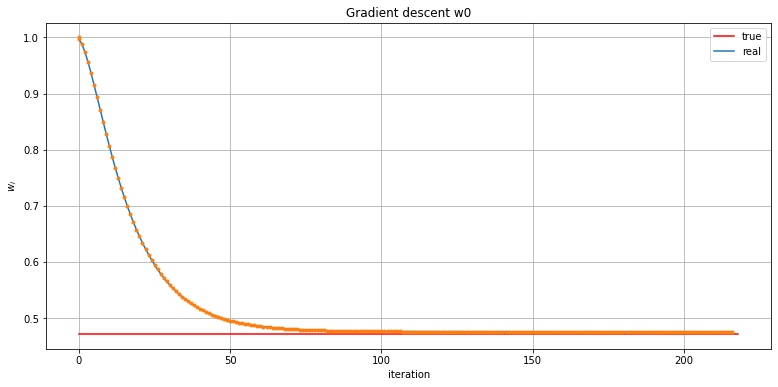

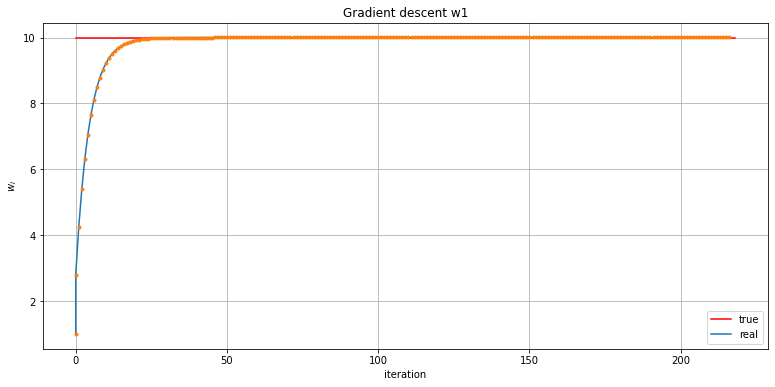

In [24]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)

for i in range(len(w_true)):
    plt.figure(figsize=(13, 6))
    plt.title('Gradient descent w'+str(i))
    plt.xlabel('iteration')
    plt.ylabel(r'$w_i$')
    
    plt.plot([0, len(w_list)], [w_true[i], w_true[i]], c='r', label = 'true')
    plt.plot(w_array[:, 0], w_array[:, i+1], label = 'real')
    plt.plot(w_array[:, 0], w_array[:, i+1],'.')
    plt.grid(True)
    plt.legend()
    plt.show()

После каждой итерации значения искомых весов приближаются к истинным, однако, не становятся им равны из-за шума, добавленного в вектор ответов.

Посмотрим как изменялось значение среднеквадратичной ошибки MSE с увеличением количества итераций

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


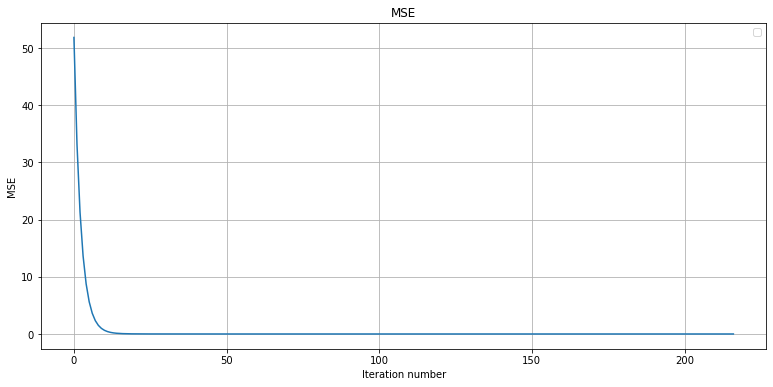

In [25]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

Изменения в пространстве решения. 

Сравним реальное распределение объектов-ответов, идеальное, предсказания (расчитанные по созданной модели)

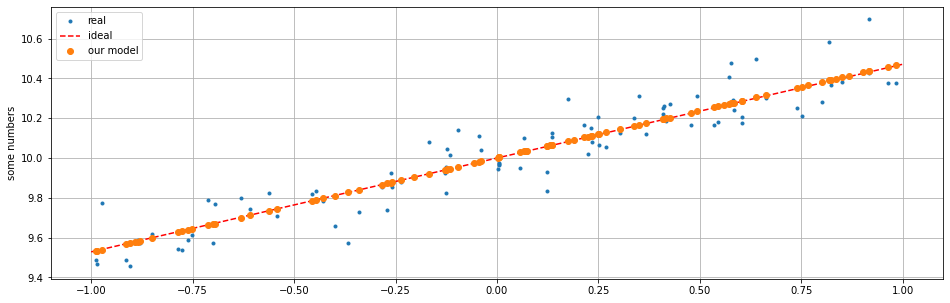

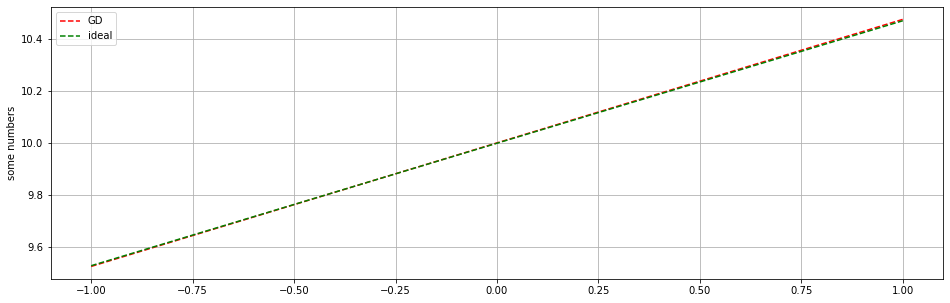

In [26]:
N = 100
plt.figure(figsize = (16,5))
plt.plot(X[:N,:n_features], Y[:N],'.', label = 'real')
plt.plot(X_true[:N,:n_features], Y_true,'r--', label = 'ideal')

plt.plot(X[:N,:n_features],np.dot(X[:N,:],new_w),'o', label='our model')
plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize = (16,5))

#plt.plot(X_true, Y_true,'r--', label = 'ideal')
plt.plot(X_true[:,:n_features],np.dot(X_true,new_w),'r--', label = 'GD')
plt.plot(X_true[:,:n_features],Y_true,'g--', label = 'ideal')

plt.ylabel('some numbers')
plt.grid(True)
plt.legend()
plt.show()

Видно, что изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Если длина шага будет слишком мала, то метод будет слишком медленно приближаться к правильному ответу, и потребуется очень большое количество итераций для достижения сходимости. Если же длина наоборот будет слишком большой, появится вероятность "перепрыгивания" алгоритма через минимум функции или вообще отсутствия сходимости градиентного спуска.

Применяется методика использования переменного размера шага: на начальных этапах берется большой шаг, который с увеличением количества итераций снижается. Одна из таких методик - вычисление на каждой итерации размера шага по формуле

$$\eta_{k} = \frac{c}{k},$$

где $c$ - некоторая константа, а $k$ - номер шага.

### Многомерный пример:

Разницы никакой нет, просто вводим количество признаков больше 1 (без учета свободного коэффициента). 

Количество признаков, d: 10

Количество объектов, l: 1000

Модель: $a(x) = w_{0}+w_{1}x^{1}+...+w_{10}x^{10}$

$D_{i}=(x_{1}^{1}, x_{2}^{1},..., x_{l}^{i})$

In [27]:
n_features = 10
n_objects = 1000

Сгенерируем вектор истиных весов $w$, состоящий только из $w_{1},..,w_{10}$, и матрицу признаков $X$, которая состоит из 10 признаков $x^{i}$ и l объектов.

Учитываем константный признак и свободный коэффициент $w_{0}$

In [28]:
w_0 = 0.1
w_true = np.random.normal(size=(n_features, ))
w_true = np.hstack((w_true,[w_0]))

scaleX = 7
X = np.random.uniform(-scaleX, scaleX, (n_objects, n_features))
# добавляем константный признак x_0 = (1, ..., 1)
X = np.hstack((X,np.ones((n_objects,1))))
pprint(w_true)
pprint(X)

array([-0.26278856,  0.27113156, -0.24043919, -1.4621581 ,  1.02204918,
        0.74933384, -1.08976043,  1.21039882,  1.73042508, -0.98417623,
        0.1       ])
array([[ 5.45007705, -0.98268564,  5.93145929, ..., -5.83904578,
        -4.73109712,  1.        ],
       [-2.13808699, -1.63099687,  3.03260285, ...,  0.30816002,
         6.25442107,  1.        ],
       [ 0.20745338, -1.74674236,  0.80035224, ...,  5.01124749,
         1.74233248,  1.        ],
       ...,
       [-5.44989572, -6.68275083, -2.46291484, ..., -5.35762259,
        -3.55321717,  1.        ],
       [ 2.45113463, -2.11053142, -4.34325266, ..., -2.75650118,
        -4.62420158,  1.        ],
       [ 0.71305648,  5.64953549, -1.46367753, ...,  2.40785687,
         3.67422414,  1.        ]])


Вычислим матрицу ответов Y с добавлением случайного шума и с помощью матрицы признаков X. 

In [29]:
noise_th = 1.2
noise = np.random.normal(0, noise_th, size=(n_objects))
Y = X.dot(w_true) + noise
pprint(Y[:15])

array([-13.23652749, -10.32278132,  21.03526139,  -8.64942425,
         9.60064689,  -6.99286074,  33.87562693, -16.95144202,
        -8.96403562,  -5.04194422,   3.80277552,   5.76151111,
       -13.48662992,  17.66831645,  10.19372044])


Соответственно у нас теперь есть пары X, Y.

Посчитаем веса с помощью МНК:

In [30]:
normal_eq_w = normal_equation(X, Y)
print(normal_eq_w)

[-0.25353378  0.25969371 -0.26672376 -1.45195821  1.00612314  0.74633603
 -1.10440578  1.21179615  1.74064929 -0.98839463  0.08010272]


Посчитаем веса с помощью градиентного спуска:

In [31]:
# список векторов весов после каждой итерации
w = w_true.copy()
w[:] = 0
w_list = [[0]+w.copy().tolist()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.001

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while ( weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    # оценка рассояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(X.shape, w.shape)

(1000, 11) (11,)


In [32]:
print(X.shape, w.shape)
print(f"Новые веса: {new_w}")

(1000, 11) (11,)
Новые веса: [-0.25353368  0.2596937  -0.26672382 -1.45195819  1.00612318  0.74633598
 -1.1044058   1.21179612  1.7406493  -0.9883946   0.08009767]


In [33]:
w_array= np.array(w_list[:])
w_array.shape

(4958, 12)

In [34]:
print('w from LSM: \n',normal_eq_w) 
print('error from LSM: \n',round(mserror(X, normal_eq_w, Y), 4))

w from LSM: 
 [-0.25353378  0.25969371 -0.26672376 -1.45195821  1.00612314  0.74633603
 -1.10440578  1.21179615  1.74064929 -0.98839463  0.08010272]
error from LSM: 
 1.3834


In [35]:
print('w from GD: \n',w_list[-1,1:])
print('error from GD: \n',mserror(X, w_list[-1,1:], Y))

w from GD: 
 [-0.25353368  0.2596937  -0.26672382 -1.45195819  1.00612318  0.74633598
 -1.1044058   1.21179612  1.7406493  -0.9883946   0.08009767]
error from GD: 
 1.3834378841241084


In [36]:
print('w true: \n',w_true)

w true: 
 [-0.26278856  0.27113156 -0.24043919 -1.4621581   1.02204918  0.74933384
 -1.08976043  1.21039882  1.73042508 -0.98417623  0.1       ]


Посмотрим как изменялось значение среднеквадратичной ошибки MSE с увеличением количества итераций:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


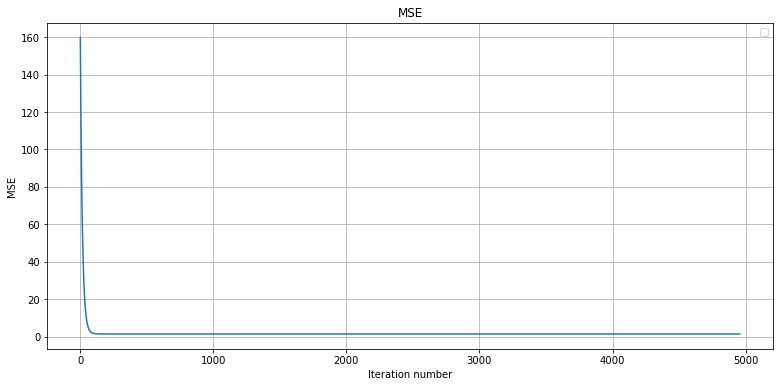

In [37]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

Визуализация изменения весов:

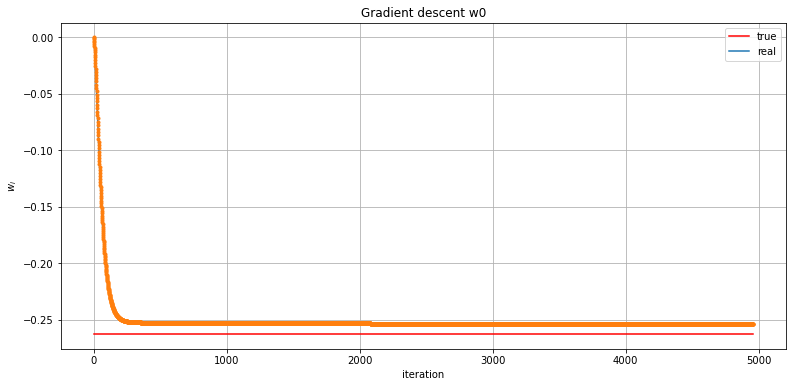

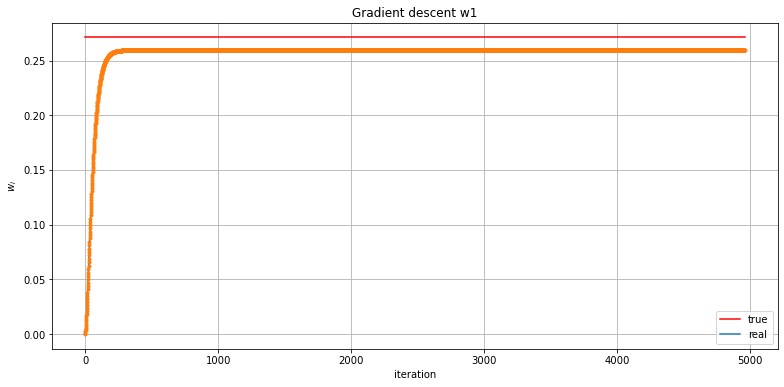

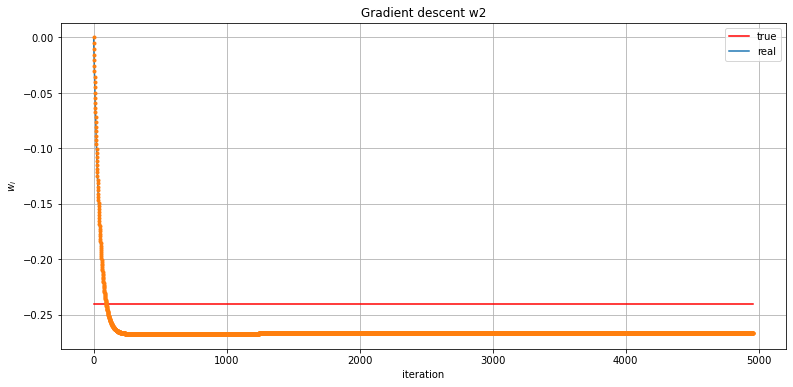

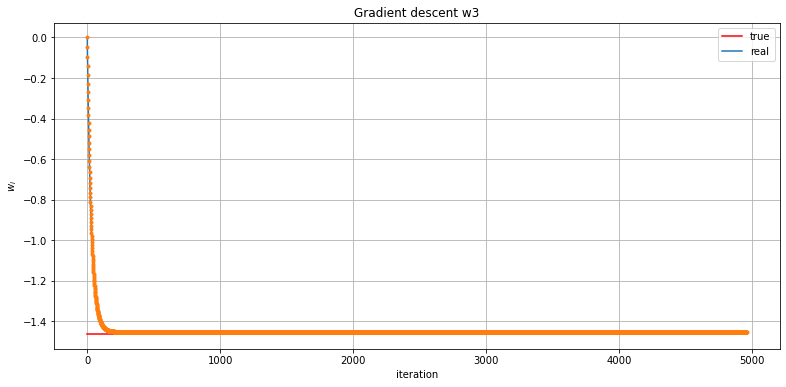

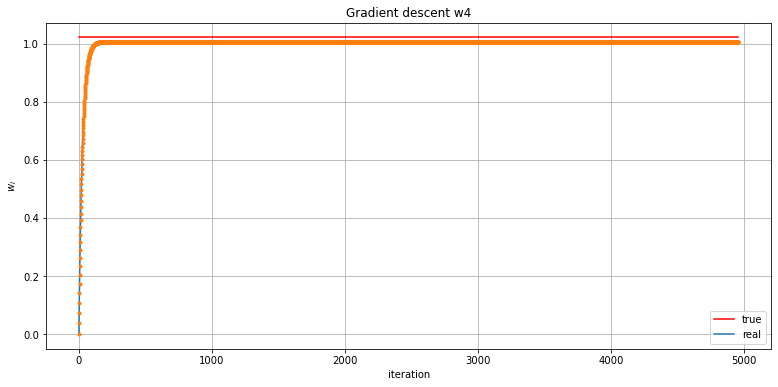

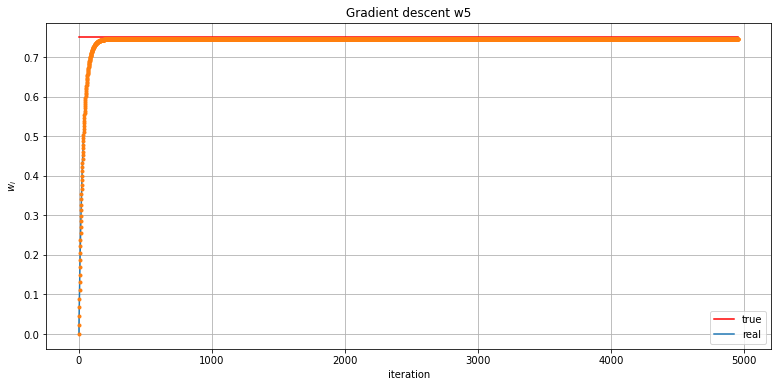

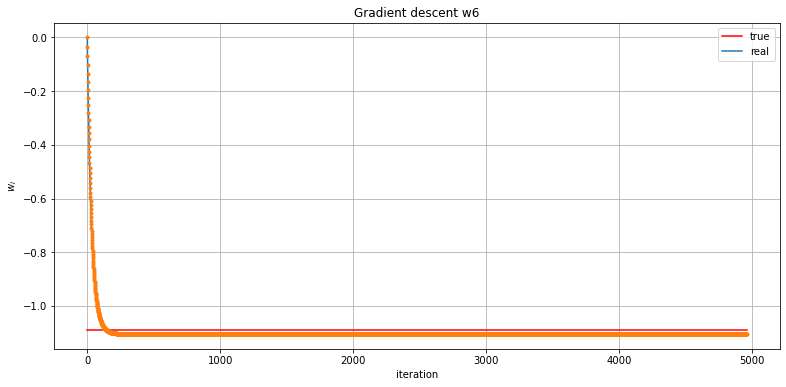

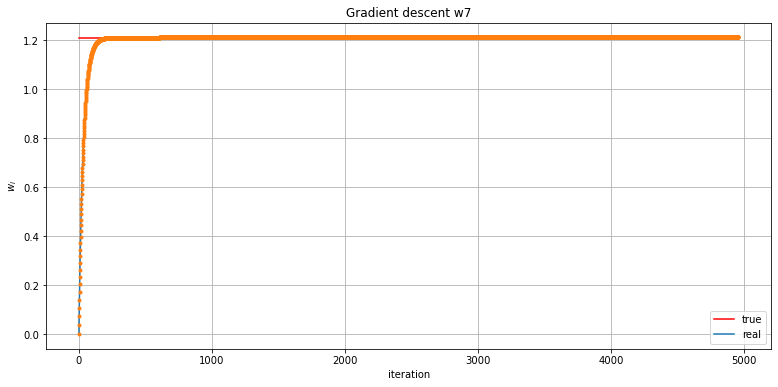

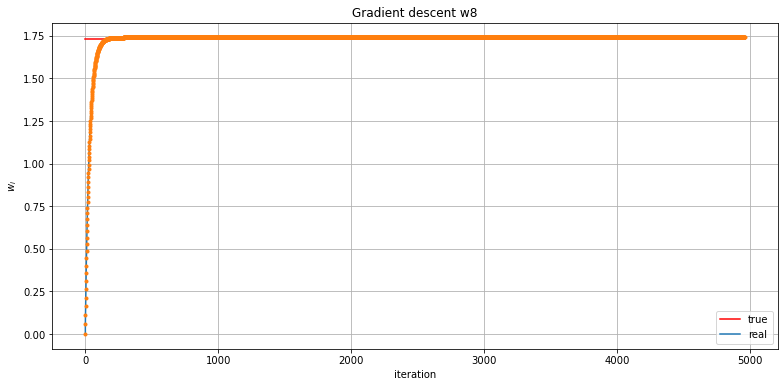

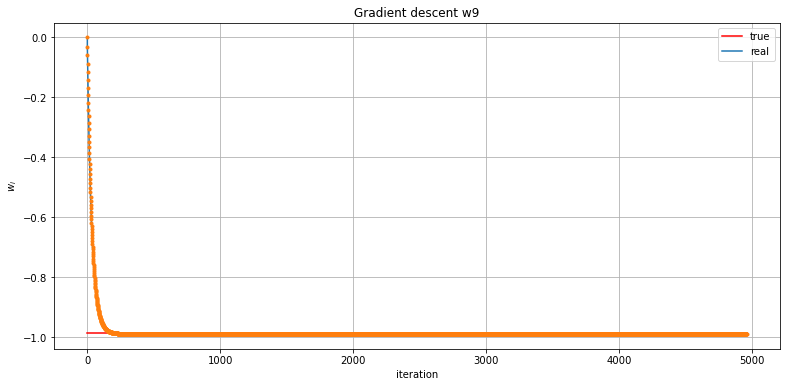

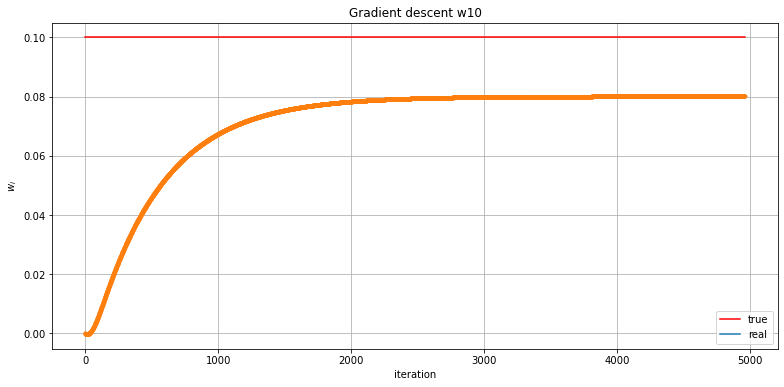

In [38]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)

for i in range(len(w_true)):
    plt.figure(figsize=(13, 6))
    plt.title('Gradient descent w'+str(i))
    plt.xlabel('iteration')
    plt.ylabel(r'$w_i$')
    
    plt.plot([0, len(w_list)], [w_true[i], w_true[i]], c='r', label = 'true')
    plt.plot(w_array[:, 0], w_array[:, i+1], label = 'real')
    plt.plot(w_array[:, 0], w_array[:, i+1],'.')
    plt.grid(True)
    plt.legend()
    plt.show()

---

Вывод о минусах градиентного спуска:

1. Проблемы мультиколлинеарности не волнуют, однако желательно также не иметь мультиколлинеарные признаки, поскольку независымые признаки сами по себе повышают качество модели. 
2. Мы должны помнить, что это все-таки цикл. Многократное повторение одного и того же процесса, нужно быть внимательным чтобы количество итераций не было очень большим. 

---

Важно! Любая задача с помощью фич-инжиниринга может стать линейной, что делает линейные модели делает очень важными для нас. 

## Дополнительные материалы

1. [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

## Литература

1. [Математическое описание метода градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
2. [Документация NumPy](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.html)